In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
subject001_experiment2_1 = pd.read_csv("arduino_person_001_exp_2_trial_1.csv", encoding="latin", header=None, names=["position", "force"])
subject001_experiment2_2 = pd.read_csv("arduino_person_001_exp_2_trial_2.csv", encoding="latin", header=None, names=["position", "force"])

subject002_experiment2_1 = pd.read_csv("arduino_person_002_exp_2_trial_1.csv", encoding="latin", header=None, names=["position", "force"])
subject002_experiment2_2 = pd.read_csv("arduino_person_002_exp_2_trial_2.csv", encoding="latin", header=None, names=["position", "force"])

subject003_experiment2_1 = pd.read_csv("arduino_person_003_exp_2_trial_1.csv", encoding="latin", header=None, names=["position", "force"])
subject003_experiment2_2 = pd.read_csv("arduino_person_003_exp_2_trial_2.csv", encoding="latin", header=None, names=["position", "force"])

subject004_experiment2_1 = pd.read_csv("arduino_person_004_exp_2_trial_1.csv", encoding="latin", header=None, names=["position", "force"])
subject004_experiment2_2 = pd.read_csv("arduino_person_004_exp_2_trial_2.csv", encoding="latin", header=None, names=["position", "force"])

subject005_experiment2_1 = pd.read_csv("arduino_person_005_exp_2_trial_1.csv", encoding="latin", header=None, names=["trigger", "position", "force"])
subject005_experiment2_2 = pd.read_csv("arduino_person_005_exp_2_trial_2.csv", encoding="latin", header=None, names=["trigger", "position", "force"])

subject006_experiment2_1 = pd.read_csv("arduino_person_006_exp_2_trial_2.csv", encoding="latin", header=None, names=["trigger", "position", "force"])
subject006_experiment2_2 = pd.read_csv("arduino_person_006_exp_2_trial_1.csv", encoding="latin", header=None, names=["trigger", "position", "force"])

subject007_experiment2_1 = pd.read_csv("arduino_person_007_exp_2_trial_2.csv", encoding="latin", header=None, names=["trigger", "position", "force"])
subject007_experiment2_2 = pd.read_csv("arduino_person_007_exp_2_trial_1.csv", encoding="latin", header=None, names=["trigger", "position", "force"])

subject008_experiment2_1 = pd.read_csv("arduino_person_008_exp_2_trial_2.csv", encoding="latin", header=None, names=["trigger", "position", "force"])
subject008_experiment2_2 = pd.read_csv("arduino_person_008_exp_2_trial_1.csv", encoding="latin", header=None, names=["trigger", "position", "force"])

subject009_experiment2_1 = pd.read_csv("arduino_person_009_exp_2_trial_2.csv", encoding="latin", header=None, names=["trigger", "position", "force"])
subject009_experiment2_2 = pd.read_csv("arduino_person_009_exp_2_trial_1.csv", encoding="latin", header=None, names=["trigger", "position", "force"])

subject010_experiment2_1 = pd.read_csv("arduino_person_010_exp_2_trial_2.csv", encoding="latin", header=None, names=["trigger", "position", "force"])
subject010_experiment2_2 = pd.read_csv("arduino_person_010_exp_2_trial_1.csv", encoding="latin", header=None, names=["trigger", "position", "force"])

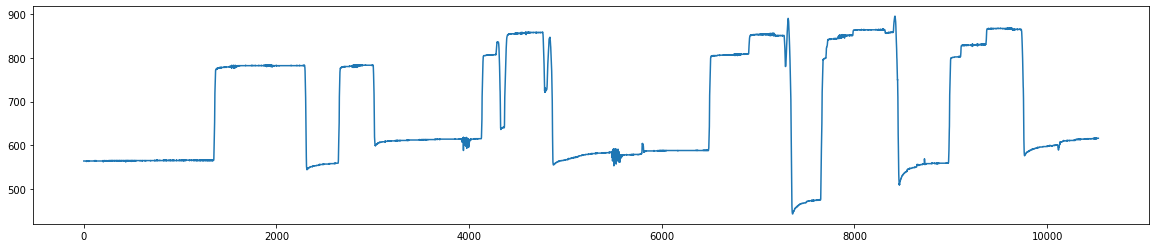

In [54]:
plt.figure(figsize=(20,4))
plt.plot(subject005_experiment2_1.loc[:, "force"])
plt.show()

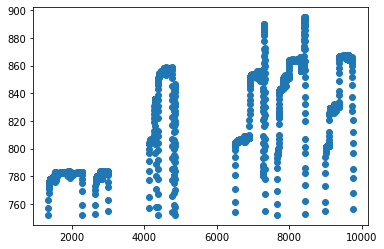

822.454947613504


In [57]:
subject005_experiment2_1["holding"] = (subject005_experiment2_1["force"] > 750) 
filtered_df = subject005_experiment2_1[subject005_experiment2_1['holding']]

plt.scatter(filtered_df.index, filtered_df.loc[:, "force"])
plt.show()

mean = filtered_df.loc[:, "force"].mean()
print(mean)

In [13]:
by_change = subject008_experiment2_2.groupby("trigger")
print(subject008_experiment2_2["trigger"])

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
10708    10.0
10709    10.0
10710    10.0
10711    10.0
10712    10.0
Name: trigger, Length: 10713, dtype: float64


In [4]:
subject001_experiment2_1[1768:1790]

,position,force
1768,407,722.0
1769,406,739.0
1770,403,757.0
1771,402,766.0
1772,401,776.0
1773,400,781.0
1774,400,784.0
1775,400,787.0
1776,400,789.0
1777,400,789.0


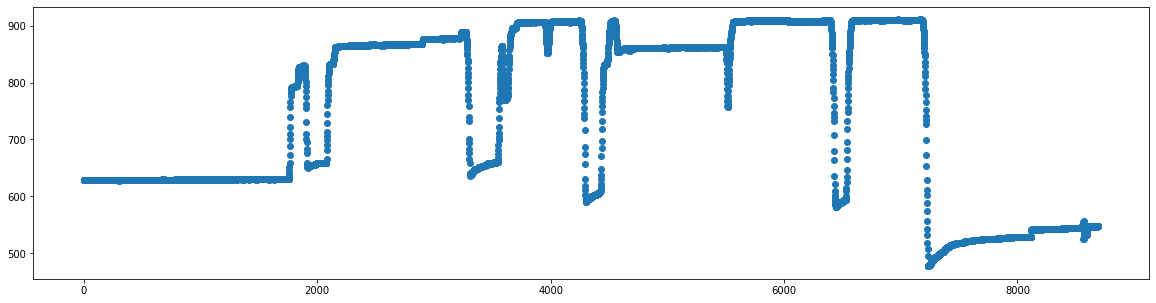

In [88]:
subject001_experiment2_1
plt.figure(figsize=(20,5))
plt.scatter(subject001_experiment2_1.index, subject001_experiment2_1.loc[:, "force"])
plt.show()


In [97]:
subset = subject001_experiment2_1[subject001_experiment2_1["force"] > 800].reset_index().copy()
subset["group_change"] = (subset["index"] - subset["index"].shift(1) - 1) != 0
subset["group_n"] = subset["group_change"].cumsum()
subset = subset.groupby("group_n")["index"].agg(["min", "max", "count"])
subset = subset[subset["count"] > 100]
subset

,min,max,count
group_n,,,
2,2094,3293,1200
4,3636,4283,648
5,4447,5510,1064
6,5526,6421,896
7,6550,7209,660


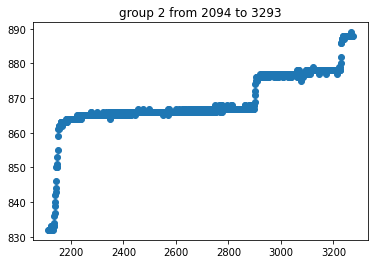

Segment average: 868.98. Std: 8.60


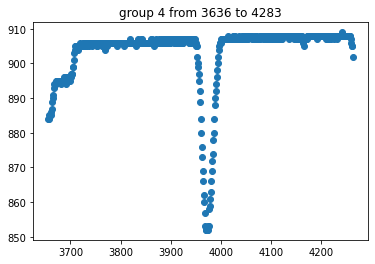

Segment average: 903.47. Std: 9.84


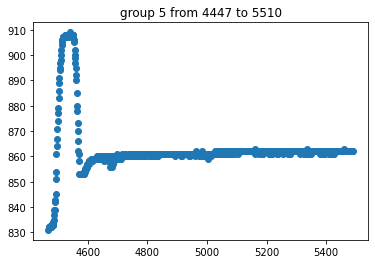

Segment average: 862.97. Std: 11.41


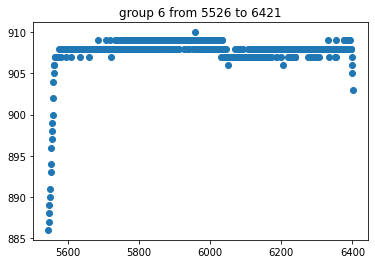

Segment average: 907.79. Std: 2.06


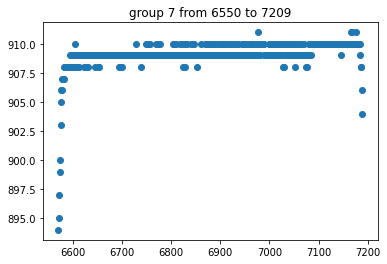

Segment average: 909.13. Std: 1.35


In [102]:
all_subsets = []
for group, row in subset.iterrows():
    group_subset = subject001_experiment2_1.loc[row["min"]+20:row["max"]-20]
    all_subsets.append(group_subset)
    plt.scatter(group_subset.index, group_subset["force"])
    plt.title(f"group {group} from {row['min']} to {row['max']}")
    plt.show()

    print(f"Segment average: {group_subset['force'].mean():.2f}. Std: {group_subset['force'].std():.2f}")

In [104]:
pd.concat(all_subsets)["force"].mean()

886.0686504217432

In [84]:
subject001_experiment2_1["diff_climbing"] = subject001_experiment2_1["force"] - subject001_experiment2_1["force"].shift(50)
subject001_experiment2_1["is_climbing"] = subject001_experiment2_1["diff_climbing"] > 150

subject001_experiment2_1["diff_cliff"] = subject001_experiment2_1["force"] - subject001_experiment2_1["force"].shift(-50)
subject001_experiment2_1["is_cliff"] = subject001_experiment2_1["diff_cliff"] < -150

subject001_experiment2_1["group"] = (subject001_experiment2_1["is_cliff"] + subject001_experiment2_1["is_climbing"]).cumsum()

by_climbing_group = subject001_experiment2_1.reset_index().groupby("group")["index"].agg(["min", "max", "count"])
by_climbing_group = by_climbing_group[(by_climbing_group["count"] > 200) & (by_climbing_group.index > 0) & (by_climbing_group.index < by_climbing_group.index.max())]
by_climbing_group

,min,max,count
group,,,
76,1810,2045,236
148,2131,3516,1386
204,3594,4390,797
296,4486,6493,2008


In [93]:
for group, row in by_climbing_group.iterrows():
    subset = subset.loc[row["min"]:row["max"]]
    plt.scatter(subset.index, subset["force"])
    plt.title(f"group {group} from {row['min']} to {row['max']}")
    plt.show()

    print(f"Segment average: {subset['force'].mean():.2f}. Std: {subset['force'].std():.2f}")

KeyError: 'force'

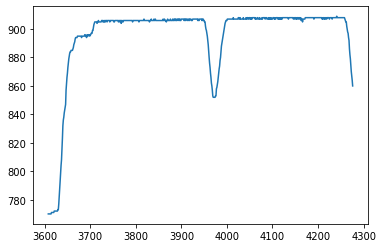

In [89]:
subset = subject001_experiment2_1.loc[3608:4276]
plt.plot(subset["force"])
plt.show()

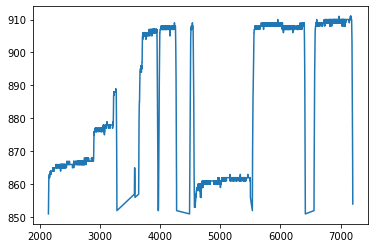

In [47]:
# data = []  # Create an empty list to store the filtered data

# for i in range(len(subject001_experiment2_1.index)):
#     if subject001_experiment2_1["force"][i] > 850:
#         data.append(subject001_experiment2_1["force"][i])  # Append the value to the list

plt.plot(subject001_experiment2_1.loc[subject001_experiment2_1["force"] > 850, "force"])
plt.show()

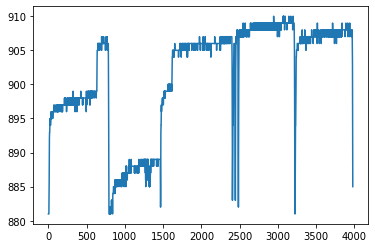

In [38]:
data = []  # Create an empty list to store the filtered data

for i in range(len(subject002_experiment2_1.index)):
    if subject002_experiment2_1["force"][i] > 880:
        data.append(subject002_experiment2_1["force"][i])  # Append the value to the list

plt.plot(data)
plt.show()

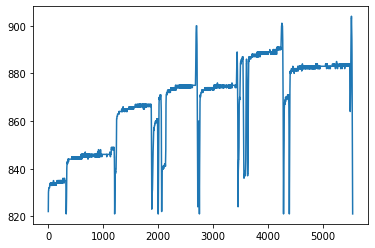

In [39]:
data = []  # Create an empty list to store the filtered data

for i in range(len(subject001_experiment2_2.index)):
    if subject001_experiment2_2["force"][i] > 820:
        data.append(subject001_experiment2_2["force"][i])  # Append the value to the list

plt.plot(data)
plt.show()

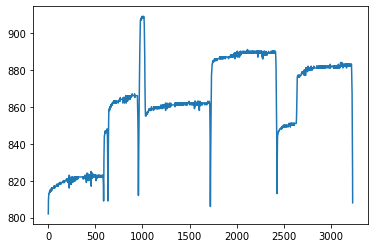

In [36]:
data = []  # Create an empty list to store the filtered data

for i in range(len(subject002_experiment2_2.index)):
    if subject002_experiment2_2["force"][i] > 800:
        data.append(subject002_experiment2_2["force"][i])  # Append the value to the list

plt.plot(data)
plt.show()